# Importing Libraries

In [ ]:
!pip install catboost

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

# Importing Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Trial table to create training model on membership tiers
file_path = '/content/drive/My Drive/Colab Notebooks/trial.csv'
df_trial = pd.read_csv(file_path)
df_trial.head(5)

,customer_id,membership_class_trial,result,total_spent,count_trx,avg_spent_per_trx,avg_annual_trx
0,997579682270,Silver,Unsatisfactory,1301,28,46.46,9
1,997458045673,Silver,Unsatisfactory,1035,25,41.40,8
2,996882350315,Silver,Unsatisfactory,699,21,33.29,7
3,996783659998,Silver,Unsatisfactory,767,19,40.37,6
4,996331197257,Silver,Unsatisfactory,554,18,30.78,6


In [5]:
# Customer table to create predictions on membership tiers
file_path = '/content/drive/My Drive/Colab Notebooks/trx_cust.csv'
df_cust = pd.read_csv(file_path)
df_cust.head(5)

,cust_id,cust_gender,total_spent,count_trx,avg_spent_per_trx,avg_annual_trx
0,NaN,NaN,1619766,17429,92.94,5810
1,257991748.0,F,840,21,40.00,7
2,272805864.0,M,1678,26,64.54,9
3,452593661.0,NaN,1091,28,38.96,9
4,477858761.0,F,1980,27,73.33,9


# Data Cleaning

In [6]:
# Drop rows with null values from trial table
df_trial = df_trial.dropna()

In [7]:
# Drop rows with null customer id from customer table
df_cust = df_cust.dropna(subset=['cust_id'])

# Data Preparation for Modeling

In [8]:
# Drop rows where result is unsatisfactory
df_trial = df_trial[df_trial['result'] != 'Unsatisfactory']
df_trial = df_trial.drop(columns=['result'])

In [9]:
# Encode the target variable using Label Encoding
label_encoder = LabelEncoder()
custom_order = ['gold', 'silver', 'bronze']
label_encoder.classes_ = custom_order

In [10]:
x = df_trial[['count_trx','avg_spent_per_trx','avg_annual_trx']]
y = label_encoder.fit_transform(df_trial['membership_class_trial'])

In [11]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Modeling

In [12]:
# Logistic regression
logreg = LogisticRegression()
y_pred_logreg = cross_val_predict(logreg, x_train, y_train, cv=5)
logreg_accuracy_train = accuracy_score(y_train, y_pred_logreg)
print("Logistic Regression Accuracy:", logreg_accuracy_train)

# KNN
knn = KNeighborsClassifier()
y_pred_knn = cross_val_predict(knn, x_train, y_train, cv=5)
knn_accuracy_train = accuracy_score(y_train, y_pred_knn)
print("K-Nearest Neighbors Classifier Accuracy:", knn_accuracy_train)

# SVM
svm = SVC()
y_pred_svm = cross_val_predict(svm, x_train, y_train, cv=5)
svm_accuracy_train = accuracy_score(y_train, y_pred_svm)
print("SVM Classifier Accuracy:", svm_accuracy_train)

# Decision tree
dt = DecisionTreeClassifier()
y_pred_dt = cross_val_predict(dt, x_train, y_train, cv=5)
dt_accuracy_train = accuracy_score(y_train, y_pred_dt)
print("Decision Tree Classifier Accuracy:", dt_accuracy_train)

# Random forest
rf = RandomForestClassifier()
y_pred_rf = cross_val_predict(rf, x_train, y_train, cv=5)
rf_accuracy_train = accuracy_score(y_train, y_pred_rf)
print("Random Forest Classifier Accuracy:", rf_accuracy_train)

# Gaussian naive bayes
nb = GaussianNB()
y_pred_nb = cross_val_predict(nb, x_train, y_train, cv=5)
nb_accuracy_train = accuracy_score(y_train, y_pred_nb)
print("Gaussian Naive Bayes Classifier Accuracy:", nb_accuracy_train)

# Neural network
nn = MLPClassifier()
y_pred_nn = cross_val_predict(nn, x_train, y_train, cv=5)
nn_accuracy_train = accuracy_score(y_train, y_pred_nn)
print("Neural Network Classifier Accuracy:", nn_accuracy_train)

# Gradient boosting
gb = GradientBoostingClassifier()
y_pred_gb = cross_val_predict(gb, x_train, y_train, cv=5)
gb_accuracy_train = accuracy_score(y_train, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy_train)

# Adaboost
adaboost = AdaBoostClassifier()
y_pred_adaboost = cross_val_predict(adaboost, x_train, y_train, cv=5)
adaboost_accuracy_train = accuracy_score(y_train, y_pred_adaboost)
print("AdaBoost Classifier Accuracy:", adaboost_accuracy_train)

# XGboost
xgb = XGBClassifier()
y_pred_xgb = cross_val_predict(xgb, x_train, y_train, cv=5)
xgb_accuracy_train = accuracy_score(y_train, y_pred_xgb)
print("XGBoost Classifier Accuracy:", xgb_accuracy_train)

# LightGBM
lgbm = LGBMClassifier(verbose=-1)
y_pred_lgbm = cross_val_predict(lgbm, x_train, y_train, cv=5)
lgbm_accuracy_train = accuracy_score(y_train, y_pred_lgbm)
print("LightGBM Classifier Accuracy:", lgbm_accuracy_train)

# Catboost
catboost = CatBoostClassifier(verbose=False)
y_pred_catboost = cross_val_predict(catboost, x_train, y_train, cv=5)
catboost_accuracy_train = accuracy_score(y_train, y_pred_catboost)
print("CatBoost Classifier Accuracy:", catboost_accuracy_train)

Logistic Regression Accuracy: 0.9375
K-Nearest Neighbors Classifier Accuracy: 1.0
SVM Classifier Accuracy: 0.75
Decision Tree Classifier Accuracy: 0.9375
Random Forest Classifier Accuracy: 0.9375
Gaussian Naive Bayes Classifier Accuracy: 1.0
Neural Network Classifier Accuracy: 0.375
Gradient Boosting Classifier Accuracy: 1.0
AdaBoost Classifier Accuracy: 1.0
XGBoost Classifier Accuracy: 0.9375
LightGBM Classifier Accuracy: 0.3125
CatBoost Classifier Accuracy: 0.9375


In [13]:
# Print top 3 models with highest accuracies
classifiers = {
    "Logistic Regression": logreg_accuracy_train,
    "K-Nearest Neighbors": knn_accuracy_train,
    "Support Vector Machine": svm_accuracy_train,
    "Decision Tree": dt_accuracy_train,
    "Random Forest": rf_accuracy_train,
    "Gaussian Naive Bayes": nb_accuracy_train,
    "Neural Network": nn_accuracy_train,
    "Gradient Boosting": gb_accuracy_train,
    "AdaBoost": adaboost_accuracy_train,
    "XGBoost": xgb_accuracy_train,
    "LightGBM": lgbm_accuracy_train,
    "CatBoost": catboost_accuracy_train
}

sorted_classifiers = sorted(classifiers.items(), key=lambda x: x[1], reverse=True)

for i in range(3):
    classifier_name, classifier_accuracy = sorted_classifiers[i]
    print(f"{classifier_name} Accuracy: {classifier_accuracy}")

K-Nearest Neighbors Accuracy: 1.0
Gaussian Naive Bayes Accuracy: 1.0
Gradient Boosting Accuracy: 1.0


# Predictions

In [14]:
X_cust = df_cust[['count_trx','avg_spent_per_trx', 'avg_annual_trx']]

In [15]:
knn = knn.fit(x, y)
predictions_encoded_knn = knn.predict(X_cust)
predicted_labels_knn = label_encoder.inverse_transform(predictions_encoded_knn)
df_cust['predictions_knn'] = predicted_labels_knn

dt = dt.fit(x, y)
predictions_encoded_dt = dt.predict(X_cust)
predicted_labels_dt = label_encoder.inverse_transform(predictions_encoded_dt)
df_cust['predictions_dt'] = predicted_labels_dt

nb = nb.fit(x, y)
predictions_encoded_nb = nb.predict(X_cust)
predicted_labels_nb = label_encoder.inverse_transform(predictions_encoded_nb)
df_cust['predictions_nb'] = predicted_labels_nb

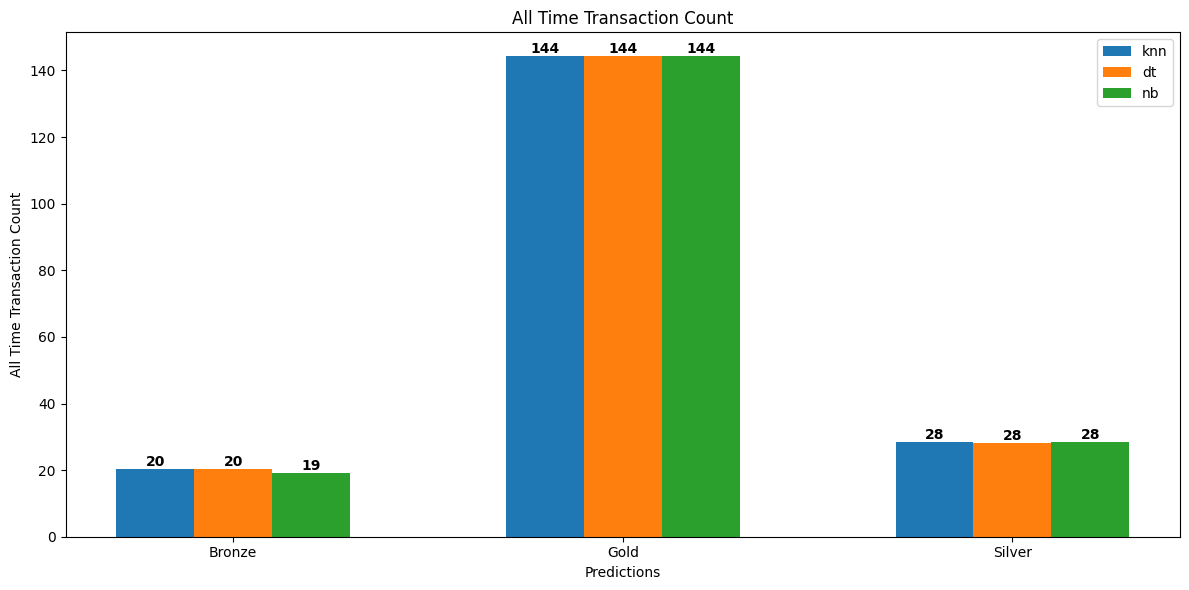

In [16]:
# View all-time transaction counts for each membership tier
transaction_count_knn = df_cust.groupby('predictions_knn')['count_trx'].mean()
transaction_count_dt = df_cust.groupby('predictions_dt')['count_trx'].mean()
transaction_count_nb = df_cust.groupby('predictions_nb')['count_trx'].mean()

plt.figure(figsize=(12, 6))

bar_width = 0.2
index = range(len(transaction_count_knn))

plt.bar(index, transaction_count_knn, width=bar_width, label='knn')
plt.bar([i + bar_width for i in index], transaction_count_dt, width=bar_width, label='dt')
plt.bar([i + 2 * bar_width for i in index], transaction_count_nb, width=bar_width, label='nb')

plt.xlabel('Predictions')
plt.ylabel('All Time Transaction Count')
plt.title('All Time Transaction Count')
plt.xticks([i + bar_width for i in index], transaction_count_knn.index)
plt.legend()

for i, value in enumerate(transaction_count_knn):
    plt.text(i, value, f'{int(value)}', ha='center', va='bottom', fontweight='bold')

for i, value in enumerate(transaction_count_dt):
    plt.text(i + bar_width, value, f'{int(value)}', ha='center', va='bottom', fontweight='bold')

for i, value in enumerate(transaction_count_nb):
    plt.text(i + 2 * bar_width, value, f'{int(value)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

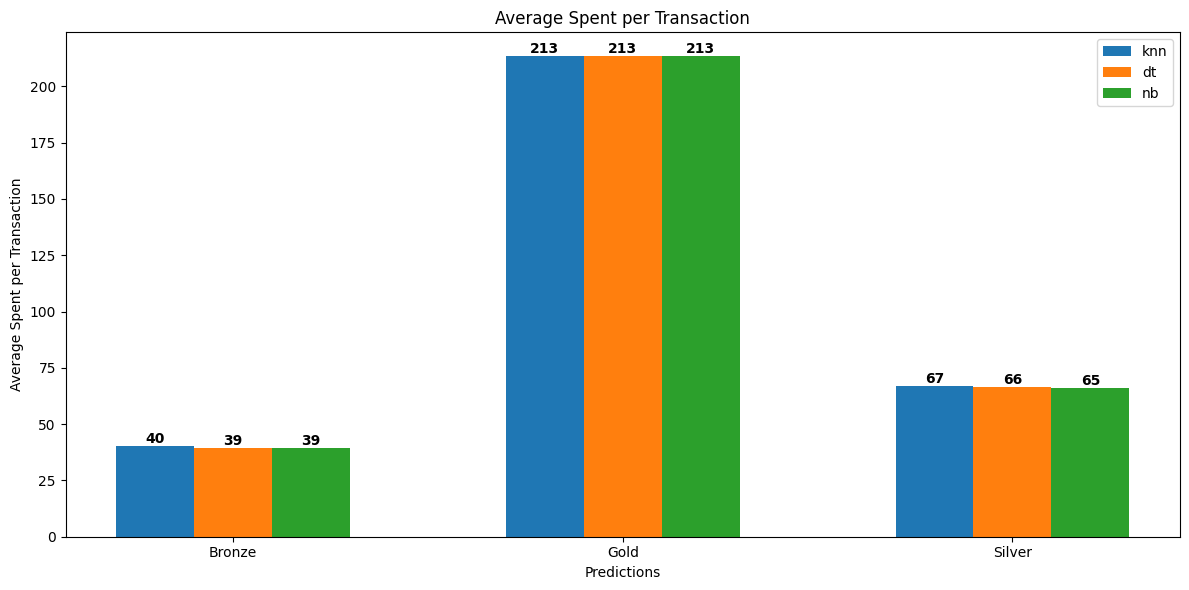

In [17]:
# View average spent per transaction for each membership tier
average_spent_knn = df_cust.groupby('predictions_knn')['avg_spent_per_trx'].mean()
average_spent_dt = df_cust.groupby('predictions_dt')['avg_spent_per_trx'].mean()
average_spent_nb = df_cust.groupby('predictions_nb')['avg_spent_per_trx'].mean()

plt.figure(figsize=(12, 6))

bar_width = 0.2
index = range(len(average_spent_knn))

plt.bar(index, average_spent_knn, width=bar_width, label='knn')
plt.bar([i + bar_width for i in index], average_spent_dt, width=bar_width, label='dt')
plt.bar([i + 2 * bar_width for i in index], average_spent_nb, width=bar_width, label='nb')

plt.xlabel('Predictions')
plt.ylabel('Average Spent per Transaction')
plt.title('Average Spent per Transaction')
plt.xticks([i + bar_width for i in index], average_spent_knn.index)
plt.legend()

for i, value in enumerate(average_spent_knn):
    plt.text(i, value, f'{int(value)}', ha='center', va='bottom', fontweight='bold')

for i, value in enumerate(average_spent_dt):
    plt.text(i + bar_width, value, f'{int(value)}', ha='center', va='bottom', fontweight='bold')

for i, value in enumerate(average_spent_nb):
    plt.text(i + 2 * bar_width, value, f'{int(value)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

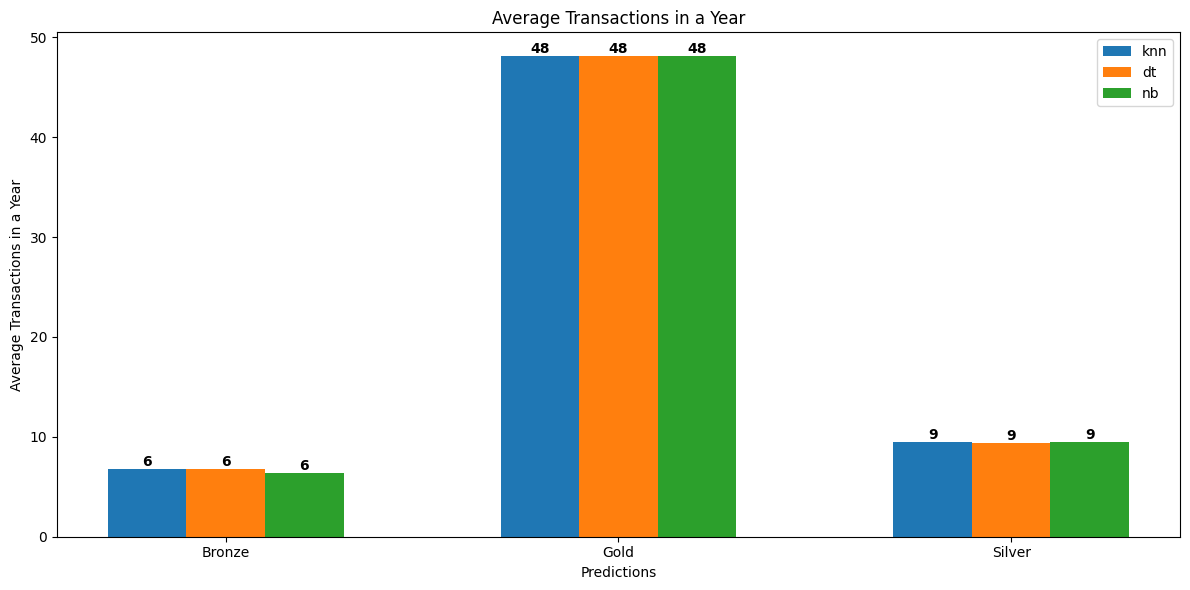

In [18]:
# View annual average transaction counts for each membership tier
average_transactions_knn = df_cust.groupby('predictions_knn')['avg_annual_trx'].mean()
average_transactions_dt = df_cust.groupby('predictions_dt')['avg_annual_trx'].mean()
average_transactions_nb = df_cust.groupby('predictions_nb')['avg_annual_trx'].mean()

plt.figure(figsize=(12, 6))

bar_width = 0.2
index = range(len(average_transactions_knn))

plt.bar(index, average_transactions_knn, width=bar_width, label='knn')
plt.bar([i + bar_width for i in index], average_transactions_dt, width=bar_width, label='dt')
plt.bar([i + 2 * bar_width for i in index], average_transactions_nb, width=bar_width, label='nb')

plt.xlabel('Predictions')
plt.ylabel('Average Transactions in a Year')
plt.title('Average Transactions in a Year')
plt.xticks([i + bar_width for i in index], average_transactions_knn.index)
plt.legend()

for i, value in enumerate(average_transactions_knn):
    plt.text(i, value, f'{int(value)}', ha='center', va='bottom', fontweight='bold')

for i, value in enumerate(average_transactions_dt):
    plt.text(i + bar_width, value, f'{int(value)}', ha='center', va='bottom', fontweight='bold')

for i, value in enumerate(average_transactions_nb):
    plt.text(i + 2 * bar_width, value, f'{int(value)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()